In [4]:
import tensorflow as tf

import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

2025-03-08 23:08:49.097947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741435729.116518  129296 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741435729.122218  129296 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 23:08:49.141999: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[...,
                                                           np.newaxis] / 255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


In [3]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x, y

In [4]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


True


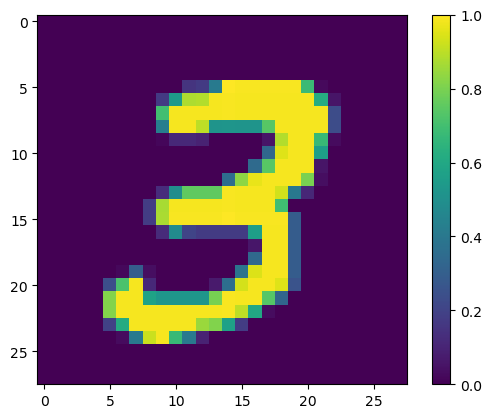

In [5]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

In [6]:
n_px = 8

x_train_small = tf.image.resize(x_train, (n_px, n_px)).numpy()
x_test_small = tf.image.resize(x_test, (n_px, n_px)).numpy()

I0000 00:00:1741435429.750564  129194 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11433 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:02:00.0, compute capability: 6.0


True


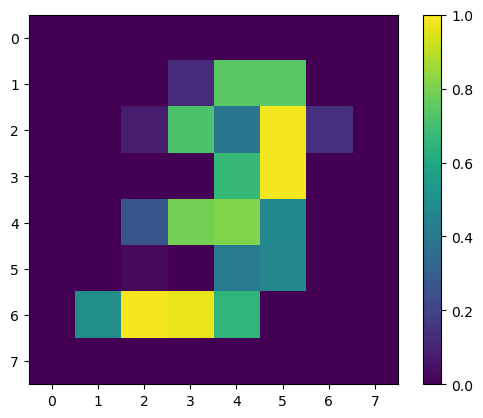

In [7]:
print(y_train[0])

plt.imshow(x_train_small[0, :, :, 0], vmin=0, vmax=1)
plt.colorbar()

In [13]:
import numpy as np

# Create a boolean mask to filter out only the samples where the label is 2 or 6
filter_mask = np.isin(y_train, [2, 6, 7])

In [14]:
# Apply the filter mask to the features and labels to keep only the selected digits
X_digits = x_train[filter_mask]
y_digits = y_train[filter_mask]

In [15]:
n_px = 16

x_train_small = tf.image.resize(X_digits, (n_px, n_px)).numpy()
# x_test_small = tf.image.resize(x_test, (n_px, n_px)).numpy()

5


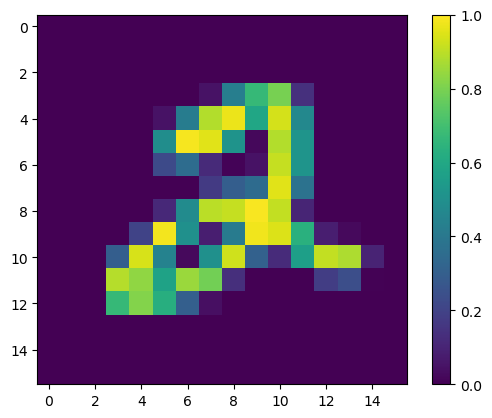

In [19]:
print(y_train[0])

plt.imshow(x_train_small[0, :, :, 0], vmin=0, vmax=1)
plt.colorbar()